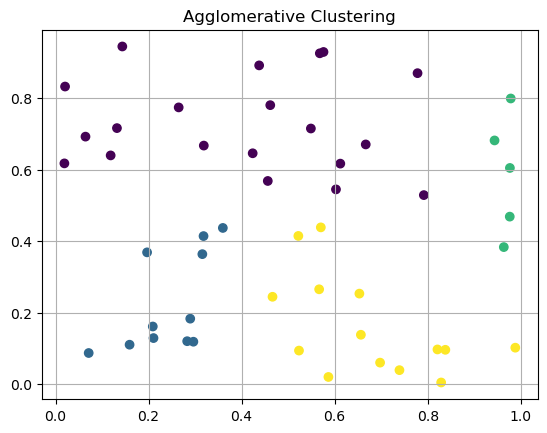

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

class AgglomerativeClustering:
    def __init__(self, n_clusters=4):
        self.n_clusters = n_clusters
        self.labels_ = None

    def fit(self, X):
        # Tính toán khoảng cách giữa các điểm
        dist_matrix = squareform(pdist(X, metric='euclidean'))
        np.fill_diagonal(dist_matrix, np.inf)  # Đặt khoảng cách điểm đến chính nó là vô cùng

        # Khởi tạo các cụm
        clusters = [[i] for i in range(len(X))]

        while len(clusters) > self.n_clusters:
            # Tìm hai cụm gần nhau nhất
            min_dist = np.min(dist_matrix)
            i, j = np.where(dist_matrix == min_dist)[0][0], np.where(dist_matrix == min_dist)[1][0]

            # Gộp hai cụm lại
            clusters[i] += clusters[j]
            del clusters[j]

            # Cập nhật ma trận khoảng cách
            # Tạo ma trận khoảng cách mới với kích thước giảm
            new_dist_matrix = np.inf * np.ones((len(clusters), len(clusters)))

            for a in range(len(clusters)):
                for b in range(len(clusters)):
                    if a != b:
                        new_dist_matrix[a, b] = self._linkage(X[clusters[a]], X[clusters[b]])

            dist_matrix = new_dist_matrix

        # Gán nhãn cho các cụm
        self.labels_ = np.zeros(len(X), dtype=int)
        for cluster_id, cluster in enumerate(clusters):
            for point in cluster:
                self.labels_[point] = cluster_id

    def _linkage(self, cluster_a, cluster_b):
        return np.mean(pdist(np.concatenate([cluster_a, cluster_b]), metric='euclidean'))

# Tạo dữ liệu thử nghiệm
np.random.seed(0)
X = np.random.rand(50, 2)

# Phân cụm
model = AgglomerativeClustering(n_clusters=4)
model.fit(X)

# Vẽ dữ liệu và các cụm
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap='viridis', marker='o')
plt.title('Agglomerative Clustering')
plt.grid()
plt.show()
